## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sms
import re
import os
import matplotlib.pyplot as plt

## Collect General Subject Info

In [14]:
data_dir='/data/projects/srndna-data'
os.listdir('%s/bids'%(data_dir))
subs_df=pd.read_csv('%s/bids/participants.tsv'%(data_dir),delim_whitespace=True)
subs_df['group'] = np.where(subs_df['age']>=45, 'Older', 'Younger')
subs_df.head()

,participant_id,age,sex,group
0,sub-106,20,F,Younger
1,sub-109,28,F,Younger
2,sub-104,20,M,Younger
3,sub-110,20,M,Younger
4,sub-105,21,F,Younger


# Behavior

In [15]:
root='%s/bids'%(data_dir)
beh_files = [os.path.join(_, f) for _, dirs, files in os.walk(root) for f in files if f.endswith('events.tsv')]


In [16]:
# Extract Data
#sub-200+ are 'aged matched partners'
data=[]
for file in beh_files:
    #extract info from file name
    sub=re.search('func/(.*)_task',file).group(1)
    #print(sub)
    if (subs_df['participant_id'].eq(sub)).any():
        task=re.search('task-(.*)_run',file).group(1)
        run=re.search('run-(.*)_events',file).group(1)
        print(task)
        # extract participant info
        age=subs_df[subs_df['participant_id']==sub]['age'].values[0]
        sex=subs_df[subs_df['participant_id']==sub]['sex'].values[0]
        group=subs_df[subs_df['participant_id']==sub]['group'].values[0]
        #import behavioral data
        temp_df=pd.read_csv(file,delim_whitespace=True)
        temp_df=temp_df[temp_df['trial_type']!='event_RT']
        missed_count=np.sum(temp_df.trial_type=='missed_trial')
        total_count=len(temp_df[temp_df['trial_type'].str.contains('event|choice|missed')])
        #print(sub,group,missed_count,total_count)
        #print(temp_df['trial_type'].unique())
        per_missed=missed_count/total_count
        mean_rt=temp_df['response_time'].mean()
        std_rt=temp_df['response_time'].std()
        data.append([sub,age,sex,group,task,run, per_missed,mean_rt,std_rt])
beh_data=pd.DataFrame(data=data,columns=['sub','age','sex','group','task','run','per_missed','mean_rt','std_rt'])

ultimatum
trust
trust
sharedreward
ultimatum
trust
trust
sharedreward
trust
trust
ultimatum
trust
ultimatum
sharedreward
trust
trust
trust
sharedreward
sharedreward
sharedreward
trust
ultimatum
trust
trust
trust
ultimatum
trust
ultimatum
trust
trust
ultimatum
sharedreward
sharedreward
trust
sharedreward
sharedreward
trust
ultimatum
trust
trust
ultimatum
trust
trust
sharedreward
trust
ultimatum
sharedreward
trust
ultimatum
trust
trust
ultimatum
trust
trust
sharedreward
trust
ultimatum
trust
sharedreward
trust
trust
sharedreward
ultimatum
trust
trust
sharedreward
ultimatum
trust
trust
sharedreward
trust
trust
sharedreward
ultimatum
ultimatum
trust
sharedreward
trust
ultimatum
ultimatum
trust
sharedreward
trust
trust
sharedreward
trust
sharedreward
trust
ultimatum
ultimatum
trust
trust
ultimatum
ultimatum
sharedreward
trust
sharedreward
trust
trust
trust
trust
ultimatum
trust
trust
trust
sharedreward
sharedreward
ultimatum
trust
trust
trust
ultimatum
sharedreward
sharedreward
ultimatum
tr

/tmp/ipykernel_2152012/3793151932.py:23: RuntimeWarning: invalid value encountered in long_scalars
  per_missed=missed_count/total_count


ultimatum
sharedreward
trust
trust
trust
trust
trust
sharedreward
ultimatum
sharedreward
ultimatum
trust
trust
trust
trust
ultimatum
sharedreward
trust
ultimatum
trust
trust
trust
trust
sharedreward
sharedreward
trust
ultimatum
trust
ultimatum
sharedreward
trust
trust
sharedreward
trust
trust
ultimatum
sharedreward
trust
ultimatum
sharedreward
ultimatum
trust
ultimatum
sharedreward
trust
ultimatum
sharedreward
trust
sharedreward
trust
trust
ultimatum
trust
sharedreward
ultimatum
trust
trust
ultimatum
sharedreward
sharedreward
trust
trust
trust
ultimatum
trust
trust
trust
sharedreward
sharedreward
ultimatum
trust
ultimatum
trust
trust
trust
trust
trust
ultimatum
ultimatum
sharedreward
sharedreward
trust
trust
trust
sharedreward
trust
sharedreward
ultimatum
trust
ultimatum
trust
sharedreward
sharedreward
ultimatum
trust
trust
trust
ultimatum
trust
ultimatum
trust
trust
trust
trust
trust
ultimatum
sharedreward
sharedreward
sharedreward
trust
trust
trust
ultimatum
ultimatum
trust
trust
sha

/tmp/ipykernel_2152012/3793151932.py:23: RuntimeWarning: invalid value encountered in long_scalars
  per_missed=missed_count/total_count


trust
sharedreward
trust
sharedreward
trust
trust
trust
trust
ultimatum
sharedreward
trust
sharedreward
ultimatum
sharedreward
trust
trust
trust
trust
sharedreward
ultimatum
trust
ultimatum
ultimatum
ultimatum
sharedreward
sharedreward
trust
trust
ultimatum
trust
sharedreward
trust
trust
trust
sharedreward
trust
ultimatum
trust
sharedreward
trust
trust
sharedreward
ultimatum
ultimatum
trust
trust
trust
ultimatum
sharedreward
trust
ultimatum
trust
trust
sharedreward
trust
ultimatum
sharedreward
trust
trust
trust
ultimatum
trust
sharedreward
trust
trust
ultimatum
sharedreward
sharedreward
trust
ultimatum
trust
trust
trust
trust
trust
sharedreward
sharedreward
trust
ultimatum
trust
ultimatum
sharedreward
ultimatum
ultimatum
trust
trust
sharedreward
trust
trust
trust
trust
trust
trust
sharedreward
ultimatum
sharedreward
trust
trust
ultimatum
ultimatum
trust
ultimatum
sharedreward
sharedreward
trust
ultimatum
trust
ultimatum
trust
sharedreward
sharedreward


,age,per_missed,mean_rt,std_rt
task,,,,
sharedreward,45.28,0.074028,0.797155,0.352738
trust,44.25,0.038354,1.833635,0.329875
ultimatum,45.28,0.008582,1.393983,0.284998


age  per_missed   mean_rt    std_rt
group   task                                                   
Older   sharedreward  69.208333    0.124132  0.914322  0.396057
        trust         69.247525    0.058361  1.949286  0.346662
        ultimatum     69.208333    0.012324  1.344434  0.324721
Younger sharedreward  23.192308    0.027778  0.688999  0.312751
        trust         23.033613    0.021709  1.737421  0.315909
        ultimatum     23.192308    0.005127  1.439721  0.248331

,age,per_missed,mean_rt,std_rt
group,,,,
Older,69.228426,0.063219,1.545639,0.353420
Younger,23.107623,0.019257,1.423527,0.299415


,age,per_missed,mean_rt,std_rt
group,,,,
Older,4.241871,0.126188,0.508043,0.127743
Younger,3.950948,0.058515,0.472647,0.104220


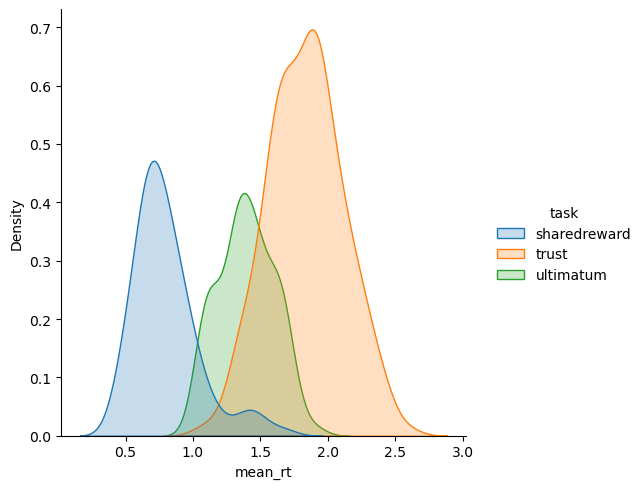

In [5]:
beh_data=beh_data.sort_values(by = ['sub', 'task'])
display(beh_data.groupby(by='task').mean())
display(beh_data.groupby(by=['group','task']).mean())
display(beh_data.groupby(by=['group']).mean())
display(beh_data.groupby(by=['group']).std())
sms.displot(beh_data, x="mean_rt", hue="task", kind="kde", fill=True)
plt.show()

## Response Times were highly variable in each task

In [17]:
from statsmodels.stats.anova import AnovaRM
print(AnovaRM(data=beh_data, depvar='mean_rt',
              subject='sub', within=['task'],aggregate_func='mean').fit())

               Anova
     F Value  Num DF  Den DF Pr > F
-----------------------------------
task 409.2990 2.0000 98.0000 0.0000



## We did(not) find age-related differences in the 
1. proportion of missed trials in each task
2. differences in response time

In [18]:
age_df=beh_data.groupby(by='sub').mean().reset_index()
age_df['Older']=age_df['age']>40
display(age_df.groupby(by=['Older']).mean())
display(age_df.groupby(by=['Older']).std())
from scipy.stats import ttest_ind
#missed
y_missed=age_df[age_df['Older']==False]['per_missed']
o_missed=age_df[age_df['Older']==True]['per_missed']
t,p=ttest_ind(y_missed,o_missed,equal_var=False)
if p<0.05:
    print("There was a significant difference in number of missed trials t: %s p:%s"%(t,p))
else:
    print("There was !Not! a significant difference in number of missed trials t: %s p:%s"%(t,p))
#Mean RT
y_missed=age_df[age_df['Older']==False]['mean_rt']
o_missed=age_df[age_df['Older']==True]['mean_rt']
t,p=ttest_ind(y_missed,o_missed,equal_var=False)
if p<0.05:
    print("There was a significant difference in Mean RT t: %s p:%s"%(t,p))
else:
    print("There was !Not! a significant difference in  Mean RT t: %s p:%s"%(t,p))
#STD RT
y_missed=age_df[age_df['Older']==False]['std_rt']
o_missed=age_df[age_df['Older']==True]['std_rt']
t,p=ttest_ind(y_missed,o_missed,equal_var=False)
if p<0.05:
    print("There was a significant difference in RT VAR t: %s p:%s"%(t,p))
else:
    print("There was !Not! a significant difference in RT variability t: %s p:%s"%(t,p))

,age,per_missed,mean_rt,std_rt
Older,,,,
False,23.192308,0.019612,1.418086,0.298241
True,69.208333,0.062404,1.536087,0.351231


,age,per_missed,mean_rt,std_rt
Older,,,,
False,4.069587,0.027831,0.160649,0.075098
True,4.252663,0.075094,0.190278,0.085265


There was a significant difference in number of missed trials t: -2.6298773158443236 p:0.013569418018267804
There was a significant difference in Mean RT t: -2.359446685796814 p:0.022679672146584732
There was a significant difference in RT VAR t: -2.324157355144917 p:0.024585624634164874


# MRIQC

## Anatomicals: Get CNR values for t1 and t2 w images

In [19]:
import json
t1=[]
t2=[]
for sub in subs_df['participant_id']:
    # Get CNR for T1w
    f = open('%s/derivatives/mriqc/%s/anat/%s_T1w.json'%(data_dir,sub,sub))
    data = json.load(f)
    t1.append(data['cnr'])

    f.close()

    # Get CNR for T2w
    f = open('%s/derivatives/mriqc/%s/anat/%s_T2w.json'%(data_dir,sub,sub))
    data = json.load(f)
    t2.append(data['cnr'])
    f.close()
    
subs_df['T1w-CNR']=t1
subs_df['T2w-CNR']=t2
display(subs_df.groupby(by='group').mean())
display(subs_df.groupby(by='group').std())

,age,T1w-CNR,T2w-CNR
group,,,
Older,69.208333,1.831895,2.069778
Younger,23.192308,2.980658,2.849350


,age,T1w-CNR,T2w-CNR
group,,,
Older,4.252663,0.297647,1.153778
Younger,4.069587,0.577152,0.678319


# Anatomicals: test difference in CNR

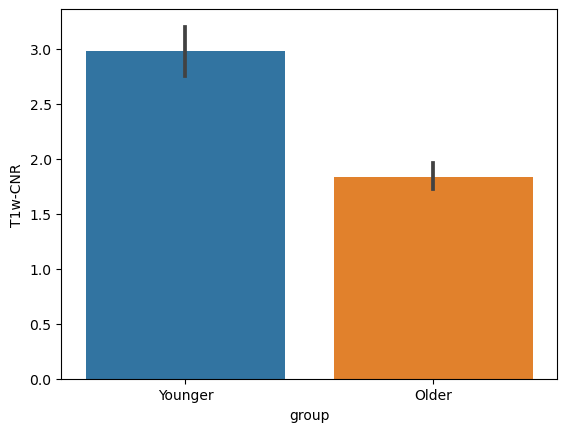

There was a significant difference T1w CNR t: -8.942262717553914 p:6.85923866126395e-11


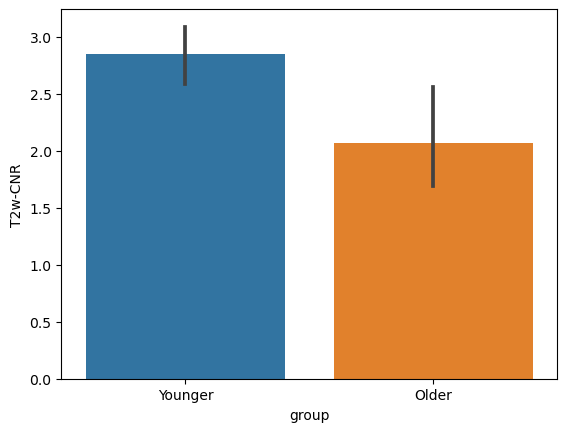

There was a significant difference T1w CNR t: -2.882094907899107 p:0.006573663073454794


,age,T1w-CNR,T2w-CNR
group,,,
Older,69.208333,1.831895,2.069778
Younger,23.192308,2.980658,2.849350


In [20]:
f=sms.barplot(x='group',y='T1w-CNR',data=subs_df)
plt.savefig('/data/projects/srndna-datapaper/figures/T1w-CNR-byGroup.svg')
plt.show()
#T1w
y_missed=subs_df[subs_df['group']=='Older']['T1w-CNR']
o_missed=subs_df[subs_df['group']=='Younger']['T1w-CNR']
t,p=ttest_ind(y_missed,o_missed,equal_var=False)
if p<0.05:
    print("There was a significant difference T1w CNR t: %s p:%s"%(t,p))
else:
    print("There was !Not! a significant difference T1w CNR t: %s p:%s"%(t,p))
    
sms.barplot(x='group',y='T2w-CNR',data=subs_df)
plt.savefig('/data/projects/srndna-datapaper/figures/T2w-CNR-byGroup.svg')

plt.show()
#T1w
y_missed=subs_df[subs_df['group']=='Older']['T2w-CNR']
o_missed=subs_df[subs_df['group']=='Younger']['T2w-CNR']
t,p=ttest_ind(y_missed,o_missed,equal_var=False)
if p<0.05:
    print("There was a significant difference T1w CNR t: %s p:%s"%(t,p))
else:
    print("There was !Not! a significant difference T1w CNR t: %s p:%s"%(t,p))
    
subs_df.groupby(by='group').mean()

## Functional Data Q

In [10]:
#list of all bold mriqc files
root='../derivatives/mriqc/'
bold_files = [os.path.join(_, f) for _, dirs, files in os.walk(root) for f in files if f.endswith('bold.json')]
# loop through files and extract fd_mean with sub and task and run
df_stuff=[]
for file in bold_files:
    sub=re.search('mriqc/(.*)/func',file).group(1)
    task=re.search('task-(.*)_run',file).group(1)
    run=re.search('run-(.*)_bold',file).group(1)
    f = open(file)
    data = json.load(f)
    df_stuff.append([sub,task,run,data['fd_mean'],data['tsnr']])
    f.close()
mr_df=pd.DataFrame(data=df_stuff,columns=['sub','task','run','fd_mean','tsnr'])
mr_df.head()

,sub,task,run,fd_mean,tsnr
0,sub-135,ultimatum,01,0.475750,52.684195
1,sub-135,sharedreward,01,0.417505,42.589379
2,sub-135,trust,03,0.367421,59.996776
3,sub-135,trust,04,0.370649,64.337834
4,sub-135,ultimatum,02,0.327007,59.897858


## FDMean

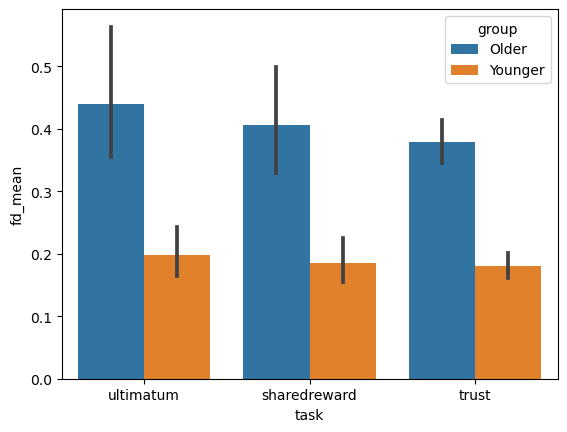

ultimatum
There was a significant difference FD_Mean t: 4.354595566468173 p:5.282861934028352e-05
sharedreward
There was a significant difference FD_Mean t: 4.600028163629546 p:2.0136386449679466e-05
trust
There was a significant difference FD_Mean t: 9.635973469890253 p:9.86348257448345e-18


fd_mean       tsnr        age  per_missed   mean_rt  \
group   task                                                                 
Older   sharedreward  0.405963  59.762604  69.208333    0.124132  0.914322   
        trust         0.378314  61.151548  69.247525    0.058361  1.949286   
        ultimatum     0.440230  57.884556  69.208333    0.012324  1.344434   
Younger sharedreward  0.185246  75.058088  23.192308    0.027778  0.688999   
        trust         0.179979  76.868260  23.033613    0.021709  1.737421   
        ultimatum     0.198304  72.579822  23.192308    0.005127  1.439721   

                        std_rt  
group   task                    
Older   sharedreward  0.396057  
        trust         0.346662  
        ultimatum     0.324721  
Younger sharedreward  0.312751  
        trust         0.315909  
        ultimatum     0.248331

fd_mean       tsnr       age  per_missed   mean_rt  \
group   task                                                                
Older   sharedreward  0.304062  17.965859  4.207179    0.204955  0.249752   
        trust         0.177632  15.729200  4.316030    0.090010  0.283383   
        ultimatum     0.360509  17.455344  4.207179    0.018490  0.209714   
Younger sharedreward  0.139852  18.171365  4.029492    0.069363  0.169641   
        trust         0.115057  18.024263  3.914191    0.064505  0.233948   
        ultimatum     0.140364  18.499770  4.029492    0.013205  0.191660   

                        std_rt  
group   task                    
Older   sharedreward  0.123684  
        trust         0.131253  
        ultimatum     0.115516  
Younger sharedreward  0.088922  
        trust         0.107920  
        ultimatum     0.094600

In [21]:
# Testing differences
task_df=pd.merge(mr_df,beh_data, on=['sub','task','run'])
sms.barplot(x='task',y='fd_mean',hue='group',data=task_df)
plt.savefig('/data/projects/srndna-datapaper/figures/fd_mean-byTaskGroup.svg')
plt.show()
for task in task_df.task.unique():
    print(task)
    temp_df=task_df[task_df['task']==task]
    #T1w
    y_missed=temp_df[temp_df['group']=='Older']['fd_mean']
    o_missed=temp_df[temp_df['group']=='Younger']['fd_mean']
    t,p=ttest_ind(y_missed,o_missed,equal_var=False)
    if p<0.05:
        print("There was a significant difference FD_Mean t: %s p:%s"%(t,p))
    else:
        print("There was !Not! a significant difference FDMean t: %s p:%s"%(t,p))
display(task_df.groupby(by=['group','task']).mean())
display(task_df.groupby(by=['group','task']).std())

## Tsnr

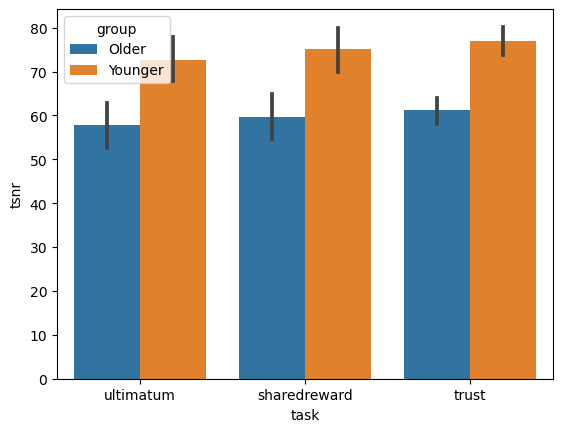

ultimatum
There was a significant difference FD_Mean t: -4.086868912386937 p:8.957673874114543e-05
sharedreward
There was a significant difference FD_Mean t: -4.230118157066744 p:5.2761256307137615e-05
trust
There was a significant difference FD_Mean t: -6.9057831055592285 p:5.39775595580542e-11


In [12]:
# Testing differences
task_df=pd.merge(mr_df,beh_data, on=['sub','task','run'])
sms.barplot(x='task',y='tsnr',hue='group',data=task_df)
plt.savefig('/data/projects/srndna-datapaper/figures/tsnr-byTaskGroup.svg')
plt.show()
for task in task_df.task.unique():
    print(task)
    temp_df=task_df[task_df['task']==task]
    #T1w
    y_missed=temp_df[temp_df['group']=='Older']['tsnr']
    o_missed=temp_df[temp_df['group']=='Younger']['tsnr']
    t,p=ttest_ind(y_missed,o_missed,equal_var=False)
    if p<0.05:
        print("There was a significant difference FD_Mean t: %s p:%s"%(t,p))
    else:
        print("There was !Not! a significant difference FDMean t: %s p:%s"%(t,p))
